In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Week 3 Kifiya/MachineLearningRating_v3.txt', delimiter = "|")

# Check the structure of the dataset
print("Dataset Information:")
df.info()

# Preview the dataset
df.head()

<ipython-input-5-7a4d30f03af8>:4: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Week 3 Kifiya/MachineLearningRating_v3.txt', delimiter = "|")


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Provin

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [21]:
# PostalCode data
df["PostalCode"].tail()

,PostalCode
1000093,7493
1000094,7493
1000095,7493
1000096,7493
1000097,7493


In [22]:
# Descriptive statistics for PostalCode
postal_code = ['PostalCode']
print("Descriptive Statistics:")
df[postal_code].describe()

Descriptive Statistics:


,PostalCode
count,1.000098e+06
mean,3.020601e+03
std,2.649854e+03
min,1.000000e+00
25%,8.270000e+02
50%,2.000000e+03
75%,4.180000e+03
max,9.870000e+03


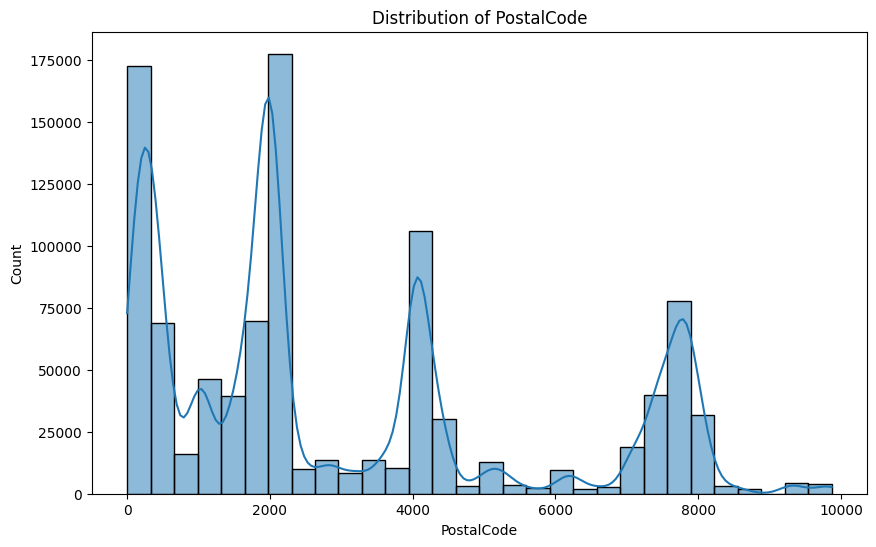

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms for PostalCode
plt.figure(figsize=(10, 6))
sns.histplot(df['PostalCode'], kde=True, bins=30)
plt.title('Distribution of PostalCode')
plt.show()

In [24]:
# Group the data by PostalCode
postal_code_grouped = df.groupby('PostalCode')['TotalClaims'].mean()

# Display the mean of Total Claims for each PostalCode
print(postal_code_grouped)

PostalCode
1        57.589092
2        41.589582
4         0.000000
5       207.378816
6        19.610447
           ...    
9781    139.499604
9830      0.000000
9868      0.000000
9869      1.580807
9870      0.000000
Name: TotalClaims, Length: 888, dtype: float64


In [27]:
from scipy.stats import ttest_ind

# Get the two categories with the maximum sizes from 'PostalCode'
top_two_zip_codes = df['PostalCode'].value_counts().nlargest(2).index

# Select two zip codes for comparison (replace '5' and '9830' with your actual zip codes)
zip_code_1 = df[df['PostalCode'] == top_two_zip_codes[0]]['TotalClaims'].dropna()
zip_code_2 = df[df['PostalCode'] == top_two_zip_codes[1]]['TotalClaims'].dropna()

# Check the sizes of each zip code group
size_zip_code_1 = len(zip_code_1)
size_zip_code_2 = len(zip_code_2)

print(f"Size of Zip Code 1: {size_zip_code_1}")
print(f"Size of Zip Code 2: {size_zip_code_2}")

# Downsample the larger group to match the size of the smaller group
min_size_zip = min(size_zip_code_1, size_zip_code_2)

zip_code_1_sample = zip_code_1.sample(n=min_size_zip, random_state=42)
zip_code_2_sample = zip_code_2.sample(n=min_size_zip, random_state=42)

# Perform t-test for independent samples (unequal variance assumption)
t_stat_zip, p_value_zip = ttest_ind(zip_code_1_sample, zip_code_2_sample, equal_var=False)

# Print t-statistic and p-value
print(f"T-statistic (Zip Codes): {t_stat_zip}, P-value (Zip Codes): {p_value_zip}")

# Interpret the p-value
if p_value_zip < 0.05:
    print(f"Reject null hypothesis: There is a significant risk difference in TotalClaims between Zip Code 1 and Zip Code 2.")
else:
    print(f"Fail to reject null hypothesis: No significant risk difference in TotalClaims between Zip Code 1 and Zip Code 2.")


Size of Zip Code 1: 133498
Size of Zip Code 2: 49171
T-statistic (Zip Codes): 0.3264446974628126, P-value (Zip Codes): 0.7440886319900835
Fail to reject null hypothesis: No significant risk difference in TotalClaims between Zip Code 1 and Zip Code 2.
